In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [14]:
East_West_Airlines=pd.read_excel("East_West_Airlines.xlsx",sheet_name='data')
df=East_West_Airlines.copy()
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [17]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

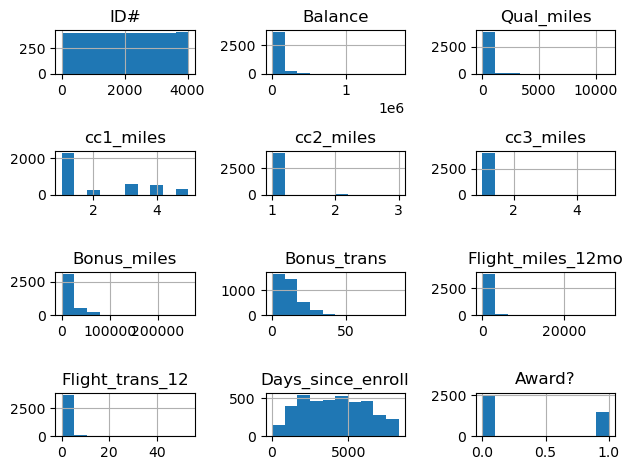

In [20]:
df.hist()
plt.tight_layout()
plt.show()


In [21]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.select_dtypes(include=[float, int]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df)

# Display the outliers
for column, outliers in outliers_iqr.items():
    print(f"Outliers in column '{column}':\n{outliers}\n")


Outliers in column 'ID#':
Series([], Name: ID#, dtype: int64)

Outliers in column 'Balance':
8       443003
24      205651
32      276571
43      619393
45      288865
         ...  
3754    221543
3756    203353
3772    822321
3788    374613
3839    204693
Name: Balance, Length: 266, dtype: int64

Outliers in column 'Qual_miles':
21      2024
24       500
45       967
70      5031
100     1182
        ... 
3902    1000
3911    2273
3953     739
3956    1005
3961     862
Name: Qual_miles, Length: 226, dtype: int64

Outliers in column 'cc1_miles':
Series([], Name: cc1_miles, dtype: int64)

Outliers in column 'cc2_miles':
8       2
198     3
226     2
381     3
392     2
561     2
794     2
940     3
1149    2
1270    3
1383    2
1389    2
1527    2
1541    2
1791    3
1918    3
1976    2
2006    2
2047    3
2166    3
2278    3
2317    2
2421    2
2557    2
2674    2
2741    2
2906    2
2967    2
2978    3
2999    3
3155    2
3191    2
3203    3
3359    2
3367    3
3487    2
3611    3
37

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [25]:
scaler.fit(df)

StandardScaler()

In [27]:
scaler.fit_transform(df)

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

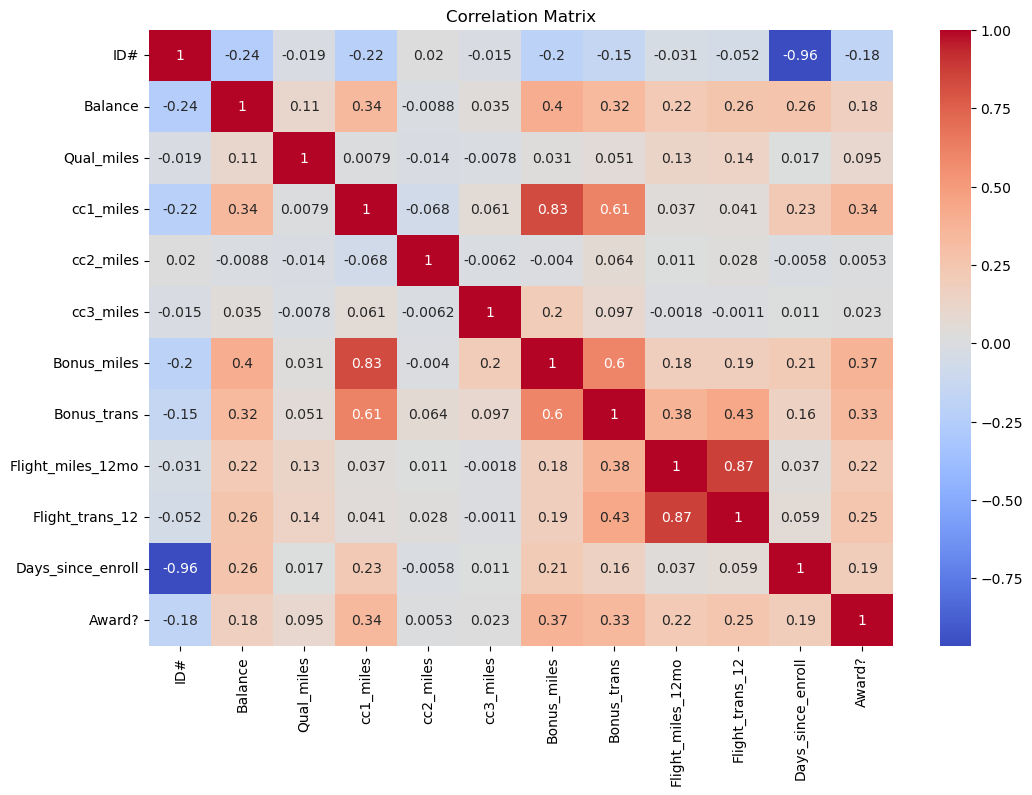

In [31]:
plt.figure(figsize=(12,8))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

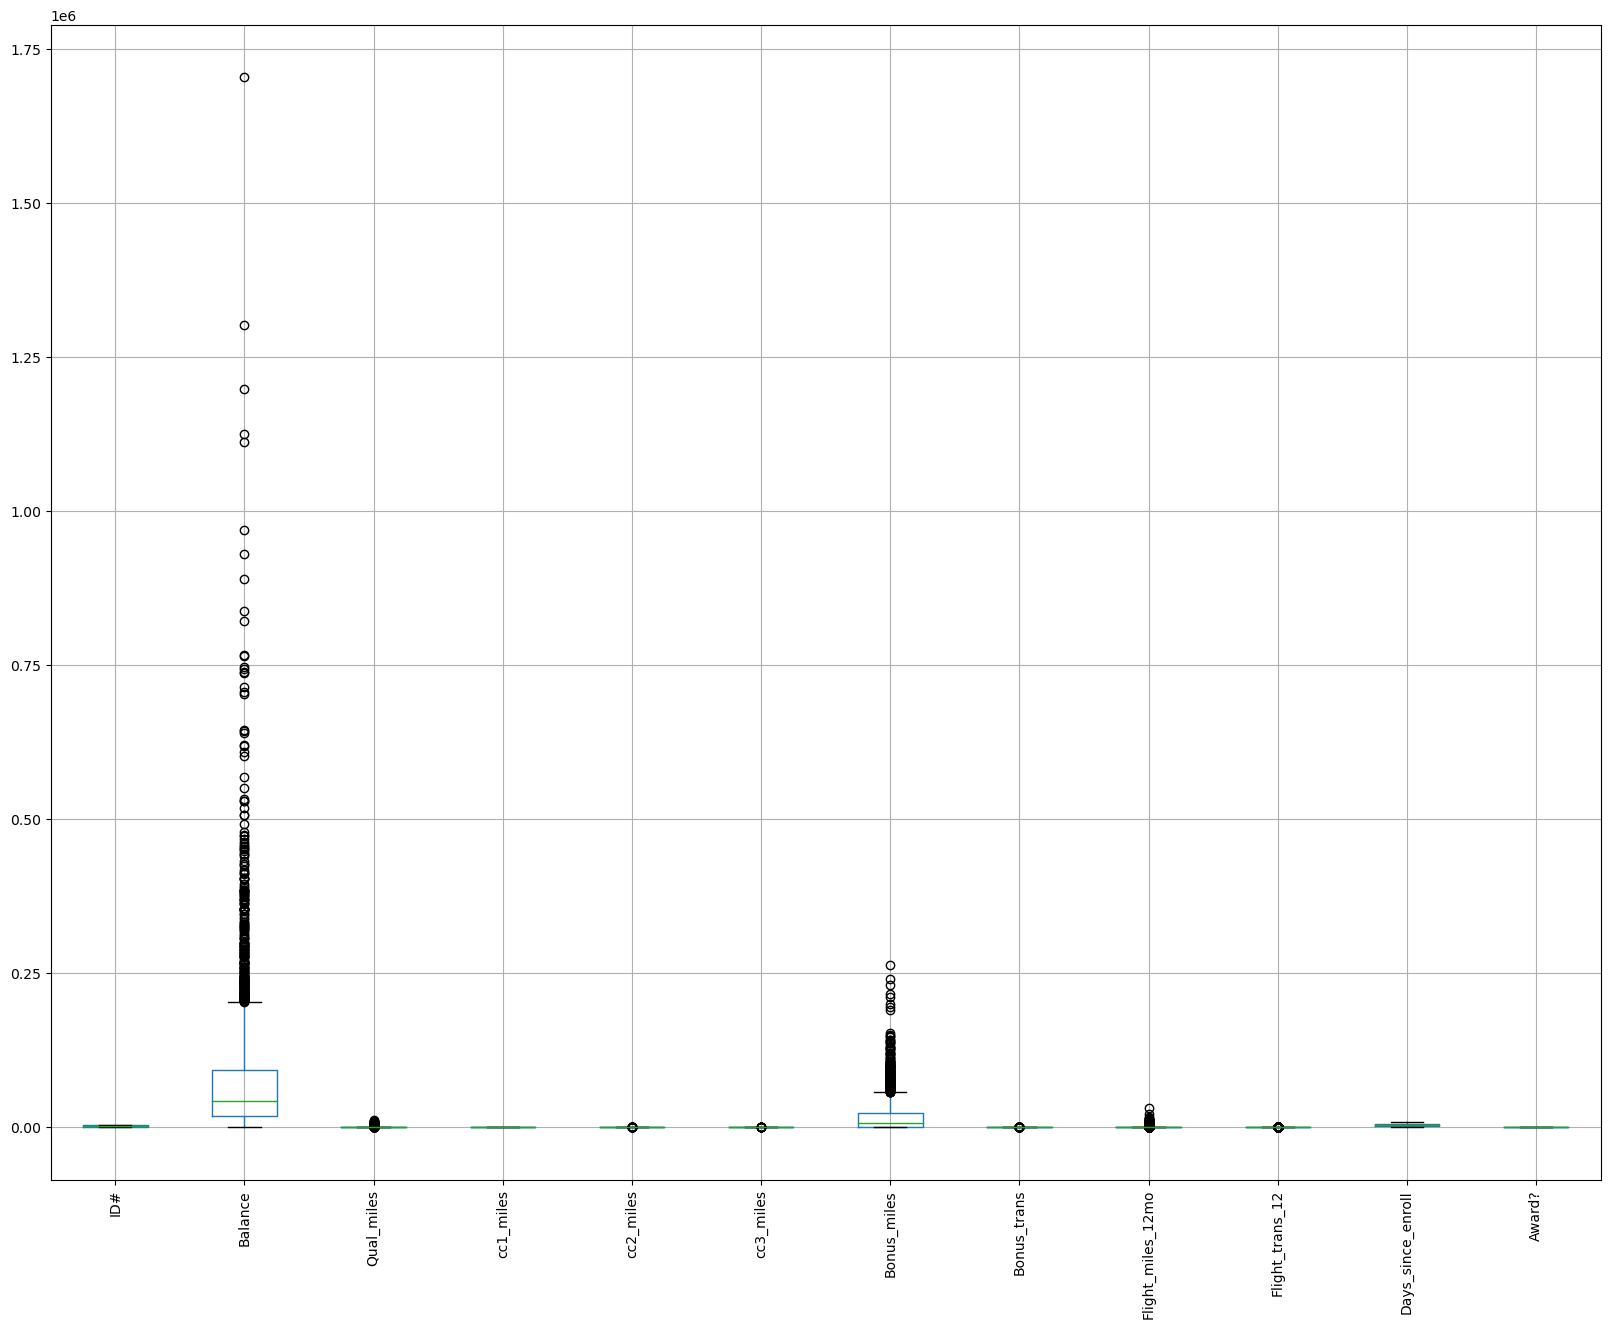

In [32]:
plt.figure(figsize=(20, 15))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


C:\Users\mvish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


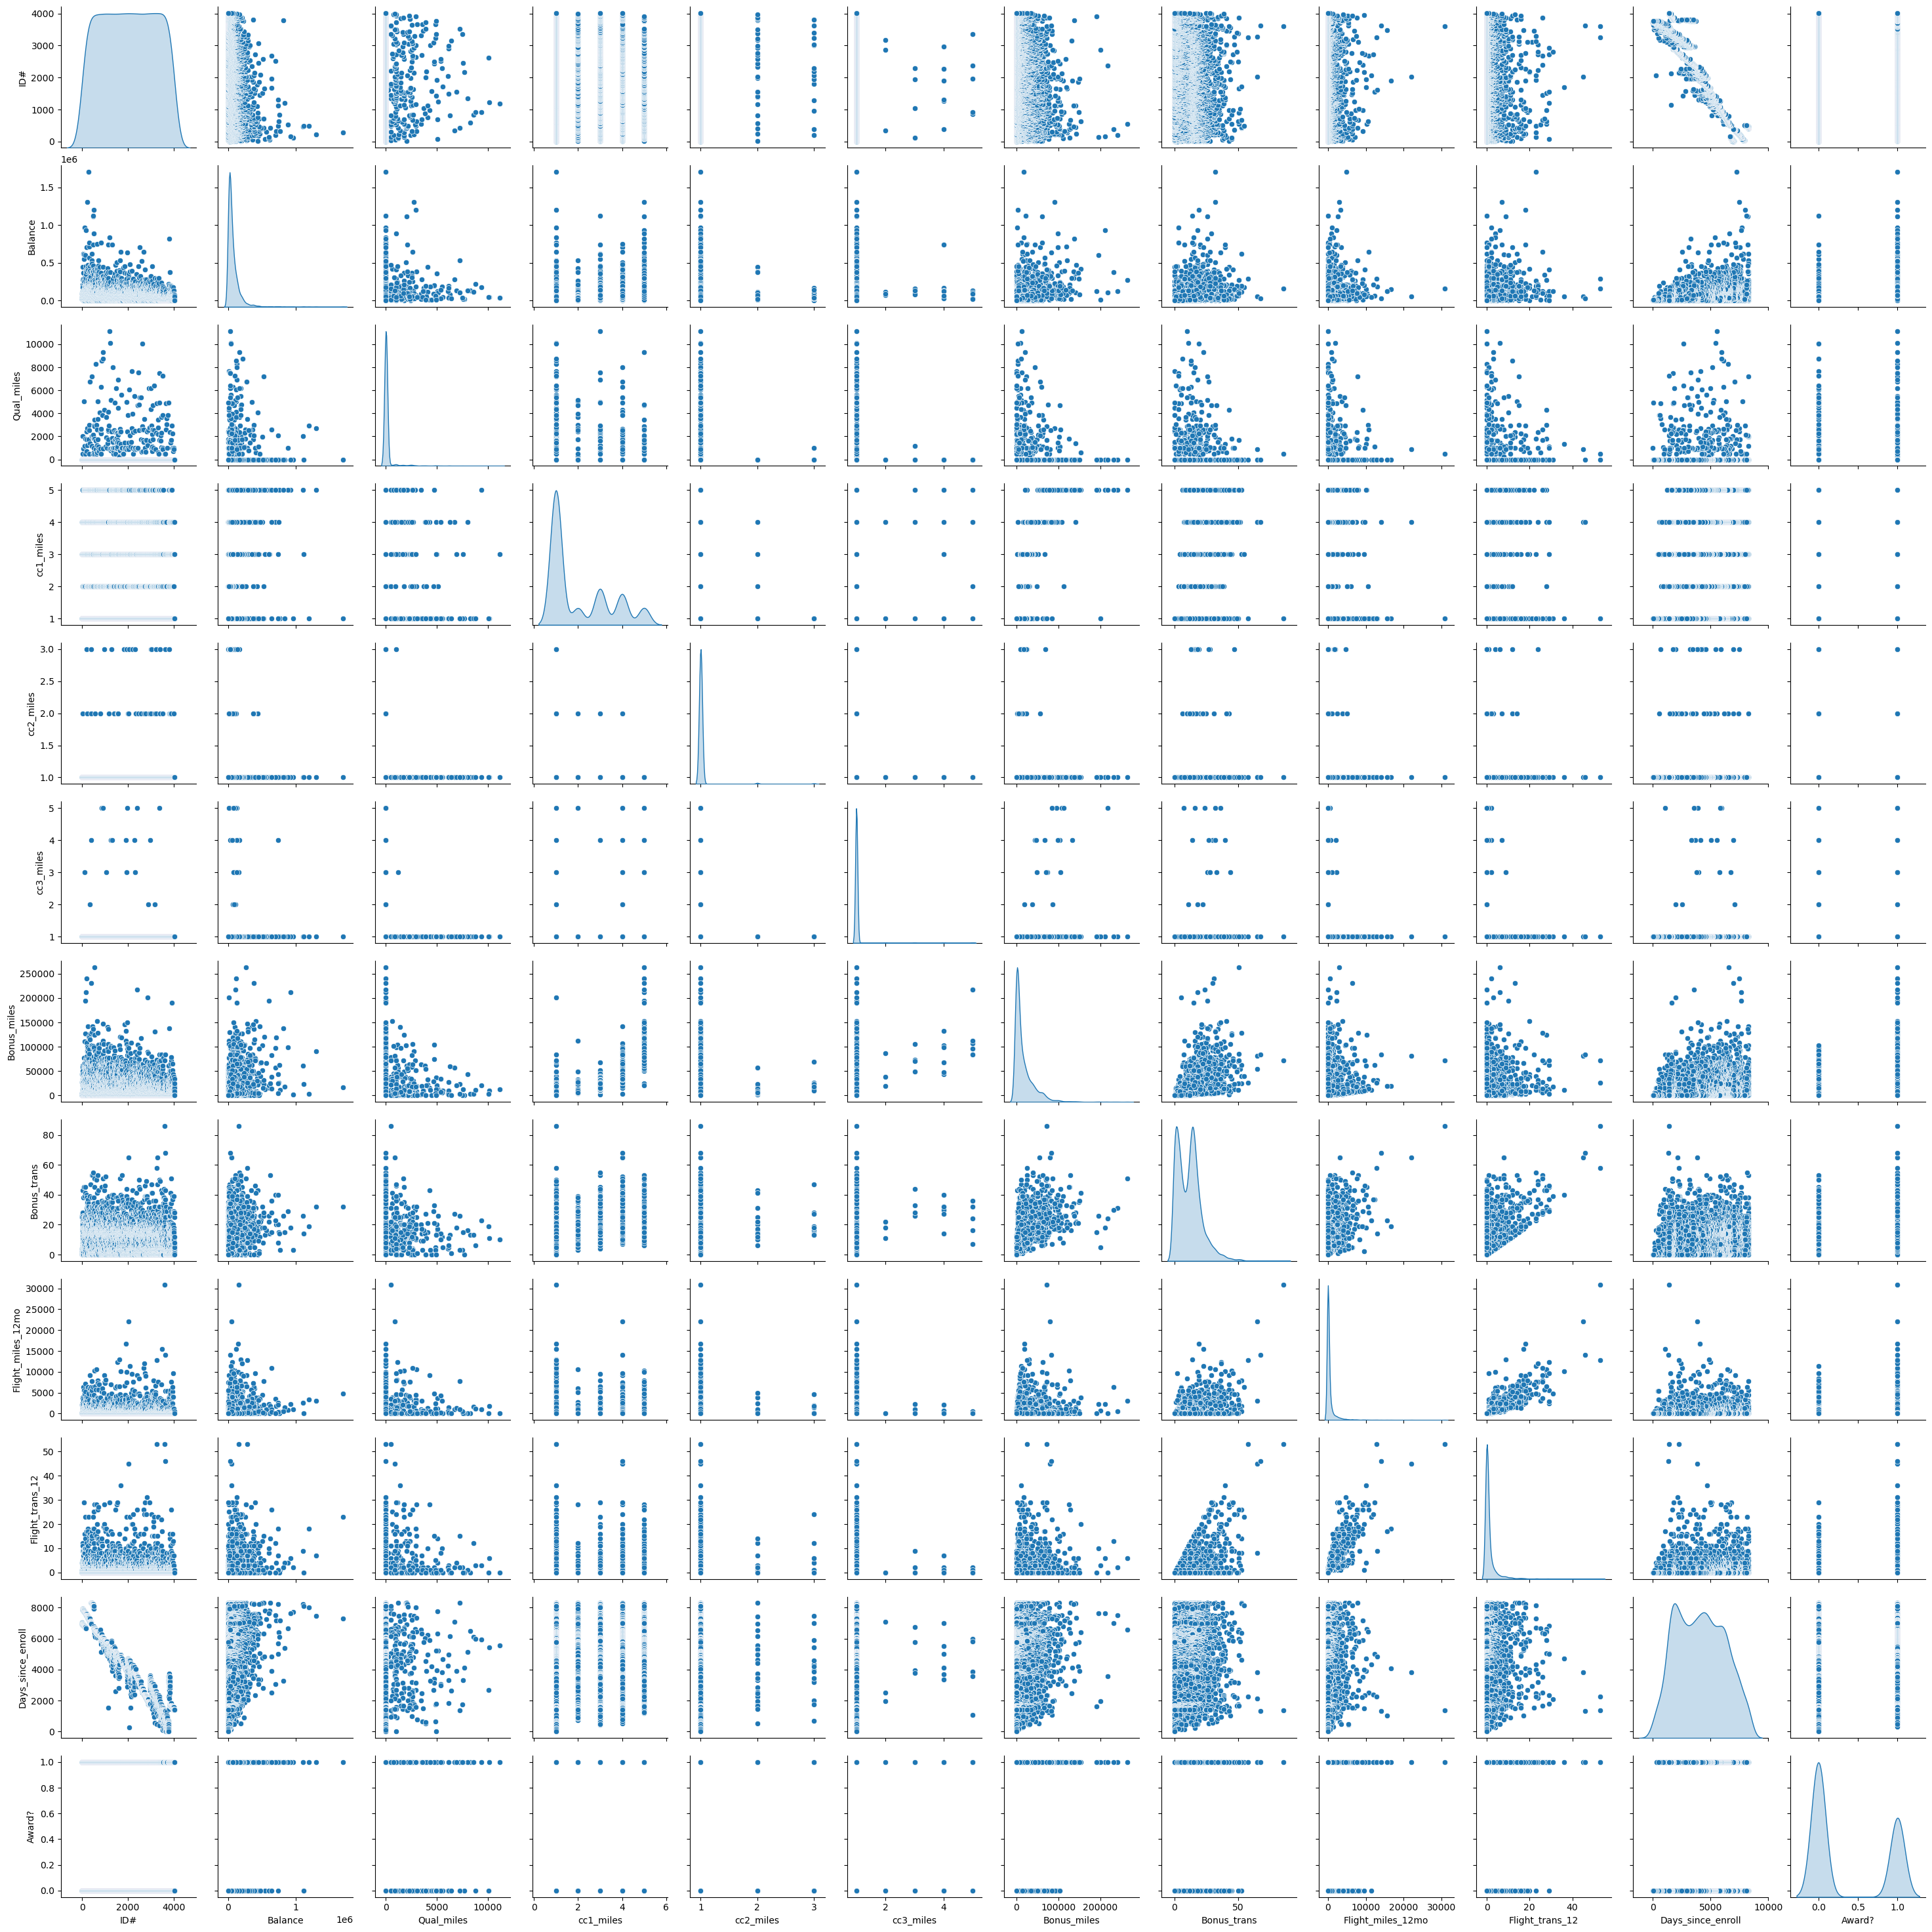

In [33]:
sns.pairplot(df, diag_kind='kde')
plt.show()


In [35]:
from sklearn.cluster import KMeans

In [41]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


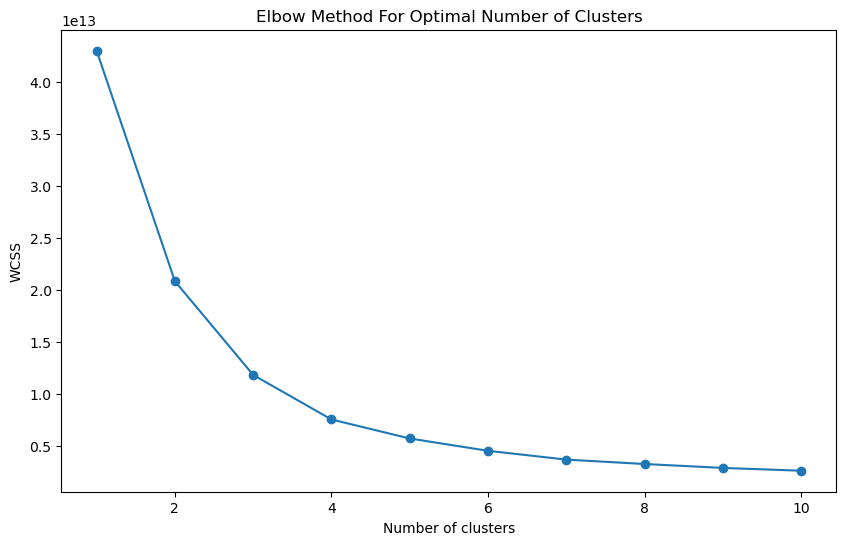

In [42]:

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
optimal_clusters = 4  # Assuming 4 clusters from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

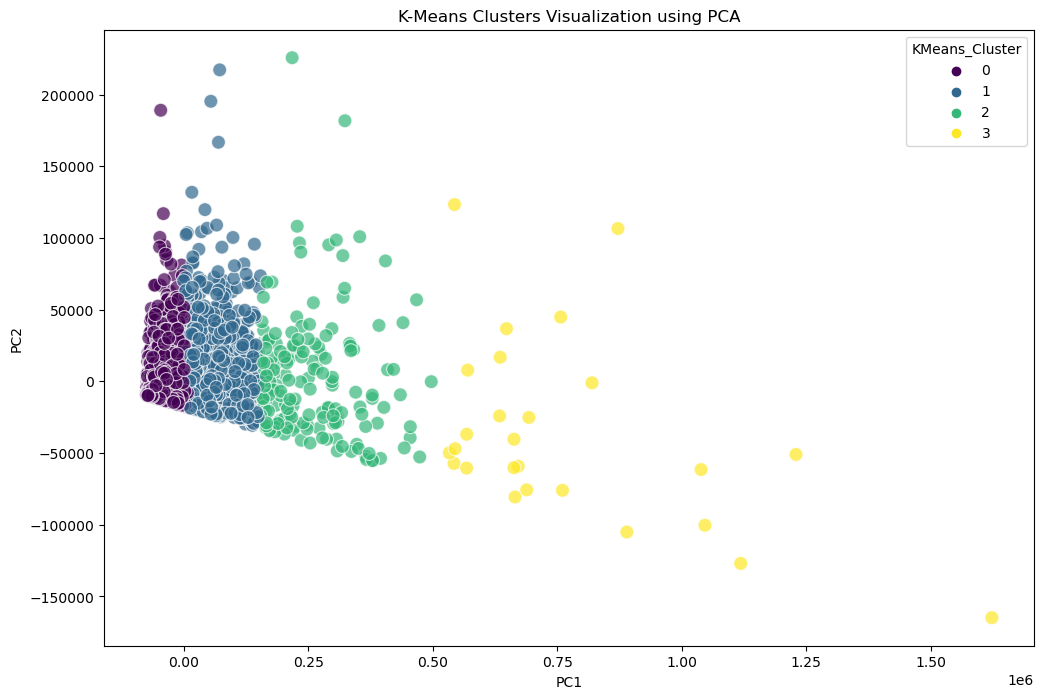

In [44]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters Visualization using PCA')
plt.show()

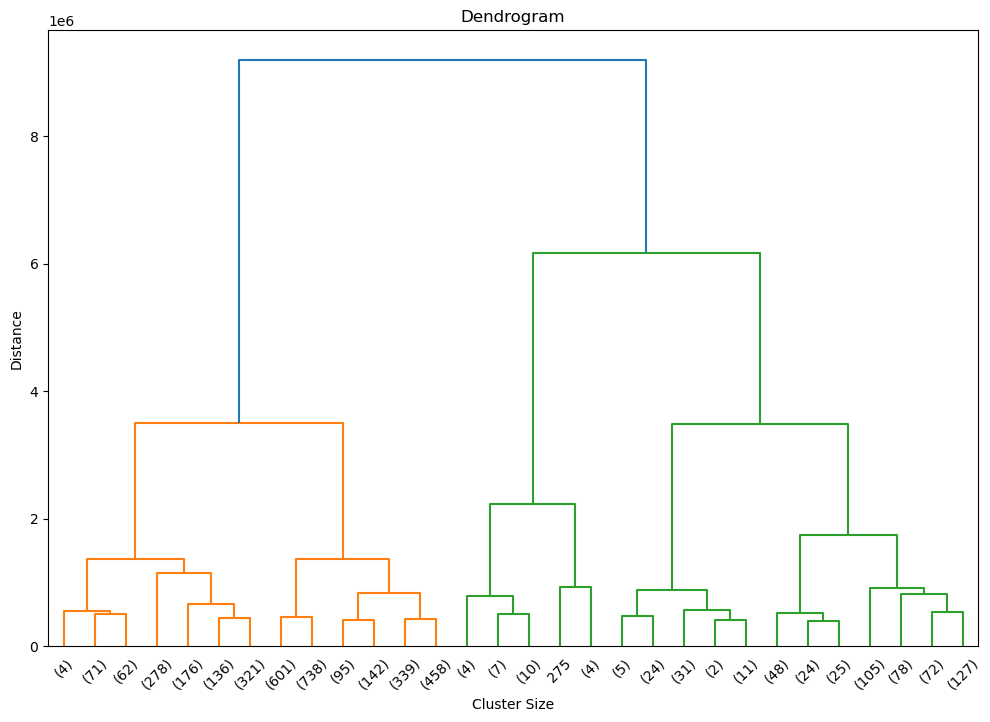

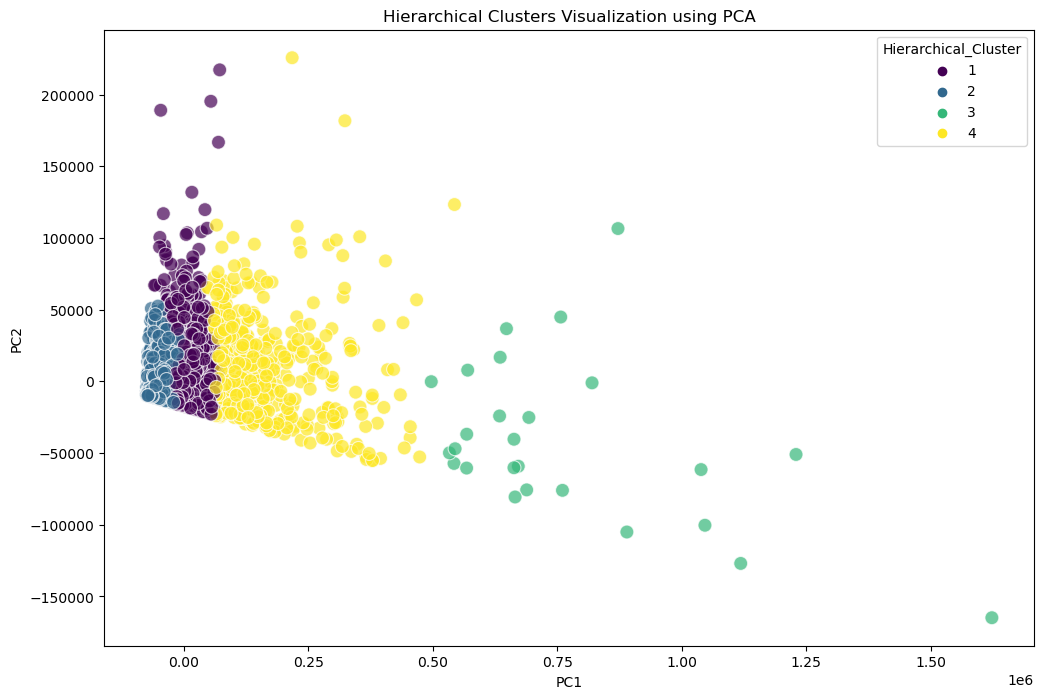

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical/agglomerative clustering
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Applying hierarchical clustering and extracting cluster labels
hierarchical_clusters = fcluster(linked, t=4, criterion='maxclust')  # Adjust t and criterion as needed
df['Hierarchical_Cluster'] = hierarchical_clusters

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clusters Visualization using PCA')
plt.show()


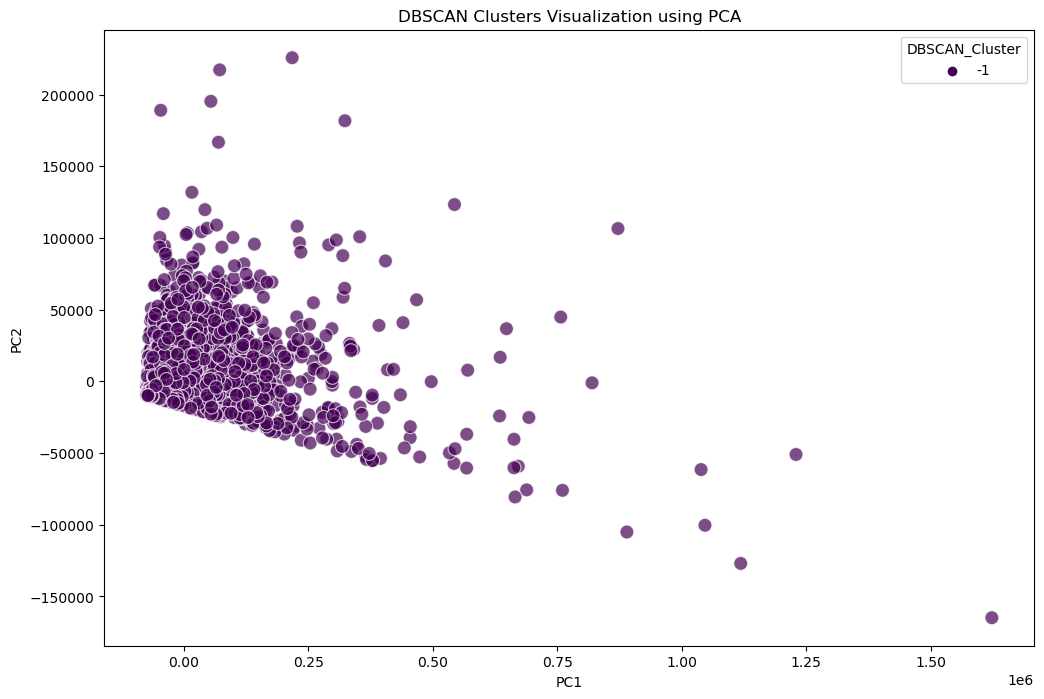

In [46]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN with sample parameter settings
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clusters Visualization using PCA')
plt.show()


In [49]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
kmeans_silhouette = silhouette_score(df, df['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

# Calculate silhouette score for Hierarchical Clustering
hierarchical_silhouette = silhouette_score(df, df['Hierarchical_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}')

# Calculate silhouette score for DBSCAN (excluding noise points labeled as -1)
dbscan_labels = df['DBSCAN_Cluster']
dbscan_silhouette = silhouette_score(df, dbscan_labels[dbscan_labels != -1])
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')


Silhouette Score for K-Means: 0.591459816027816
Silhouette Score for Hierarchical Clustering: 0.4936051857883776


ValueError: Found input variables with inconsistent numbers of samples: [3999, 0]